# FDA_practice - part 1

### 1. Top-10 Reviewer

In [2]:
# Read data

import pandas as pd

dataset_path = './Reviews.csv'
df = pd.read_csv(dataset_path)[:10000]


# Group the data by each user, and calculate the mean score and the count of reviews of each user.
# Then sort the data by the count of reviews, and append the profile name to the sorted data.

review_count = df[['UserId', 'Score']].groupby(['UserId']).agg(['mean', 'count'])
review_count.columns = review_count.columns.get_level_values(1)
review_count.sort_values(by='count', ascending=False, inplace=True)
final = review_count.head(10).join(df[['UserId', 'ProfileName']].set_index('UserId').drop_duplicates())


# Adjust the column names and the column order.

final.rename(columns={'mean': 'Score mean', 'count': 'Score count'}, inplace=True)
final = final[['ProfileName', 'Score count', 'Score mean']]

print(final)

                                               ProfileName  Score count  \
UserId                                                                    
A1Z54EM24Y40LL                                          c2           17   
A2SZLNSI5KOQJT  Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57                                    M. Torma            9   
A281NPSIMI1C2R      Rebecca of Amazon "The Rebecca Review"            8   
A3OXHLG6DIBRW8                            C. F. Hill "CFH"            7   
A3NHUQ33CFH3VM                                Citizen John            7   
A3PJZ8TU8FDQ1K                                Jared Castle            7   
AQ6SHOW0VMZGF                       K. Padgett "familyof5"            6   
A26NFIQ7KWI8Y7                                     kt rose            6   
A10H24TDLK2VDP                         William Jens Jensen            6   

                Score mean  
UserId                      
A1Z54EM24Y40LL    3.882353  
A2SZLNSI5KOQ

### 2. Plot score distribution for the user with the most number of reviews

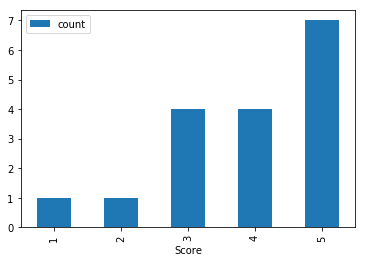

In [3]:
# Get `UserId` and select the data of it.

user_id = final.reset_index().iloc[0]['UserId']
user_data = df[['UserId', 'Score']].loc[df['UserId'] == user_id]


# Get the count of each score.

score_distribution = user_data.groupby(['Score']).count()
score_distribution.rename(columns={'UserId': 'count'}, inplace=True)


# Plot

import matplotlib.pyplot as plt

score_distribution.plot(kind='bar')
plt.show()

### 3. Plot pandas Series DataFrame (Time->Date)

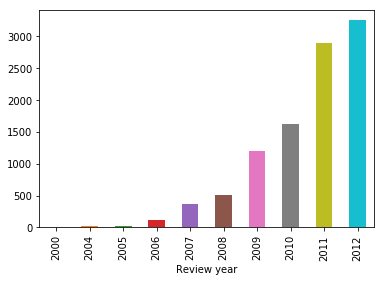

In [4]:
# Get the year of time in each data.

data_time = df[['Time']]
data_date = pd.to_datetime(data_time['Time'], unit='s')
data_year = data_date.map(lambda x: x.year)


# Get the count of each year.

year_distribution = data_year.groupby(data_year).count()
year_distribution.rename_axis('Review year', inplace=True)


# Plot

year_distribution.plot(kind='bar')
plt.show()

### 4. Plot HeatMap using seaborn

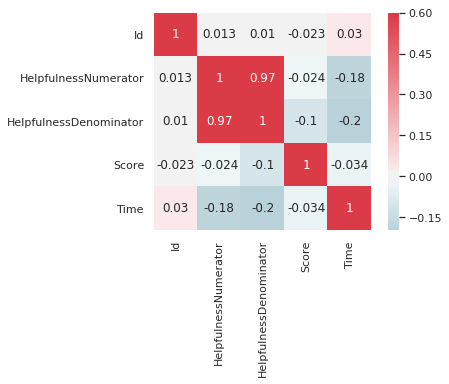

In [5]:
import seaborn as sns


# Compute the correlation matrix

numeric_data = df[['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']]
corr = numeric_data.corr()


# Generate a custom diverging colormap

sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, cmap=cmap, vmax=.6, center=0, square=True, linewidths=0, annot=True)

### 5. Helpful percent

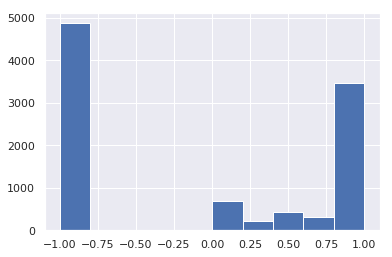

In [6]:
# Filter out the circumstance where `HelpfulnessNumerator` > `HelpfulnessDenominator`

filter_df = df[(df.HelpfulnessNumerator <= df.HelpfulnessDenominator)]
filter_df = filter_df[['HelpfulnessNumerator', 'HelpfulnessDenominator']]


# Calculate `HelpfulPercent` and fill NaN with -1

filter_df['HelpfulPercent'] = filter_df.HelpfulnessNumerator / filter_df.HelpfulnessDenominator
filter_df.fillna(-1, inplace=True)


# Plot

filter_df['HelpfulPercent'].hist(bins=10)